# BoxPlots

In [38]:
df= pd.DataFrame({'scenario_number':[], 'weights_type':[], 'PDR': [], 'avg_e2e':[], 'avg_egc':[] 
                     , 'RL_type':[]})

In [32]:
import pickle 
import pandas as pd

def read_data(type_network, rew_num):
    with open('results_Q-learning_' + type_network + '_rew' + rew_num + '.pkl', 'rb') as file:
         results_RL = pickle.load(file)


    with open('results_random_' + type_network + '.pkl', 'rb') as file:
        results_Random = pickle.load(file)
    
    with open('results_DQN_' + type_network +  '_rew' + rew_num + '.pkl', 'rb') as file:
        results_DQN = pickle.load(file)
    
     
    with open('results_DDPG_' + type_network + '_rew' + rew_num + '.pkl', 'rb') as file:
        results_DDPG = pickle.load(file)
    
    
    return results_RL,results_Random, results_DQN, results_DDPG

In [33]:
def insert_to_df(df, results, type_cluster, type_name):
    for key in results:
        PDR, avg_e2e, avg_egc = results[key][-1]
        row = {'scenario_number':key, 'weights_type':type_cluster, 'PDR':PDR, 'avg_e2e':avg_e2e,
               'avg_egc':avg_egc, 'RL_type':type_name}
        df = df.append(row, ignore_index=True)
    return df

In [39]:
def get_df(type_network, rew_num, type_name, df):
    results_RL,results_Random,  results_DQN, results_DDPG = read_data(type_network, rew_num)
    #df= pd.DataFrame({'scenario_number':[], 'weights_type':[], 'PDR': [], 'avg_e2e':[], 'avg_egc':[] 
     #                 , 'RL_type':[]})
    df = insert_to_df(df, results_RL, 'Q-learning', type_name)
    df = insert_to_df(df, results_Random, 'Random', type_name)
    df = insert_to_df(df, results_DQN, 'DQN', type_name)
    df = insert_to_df(df, results_DDPG, 'DDPG', type_name)
    return df

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxPlot(title, df, x, y, network_type, save_path=None):
    plt.figure()
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.title(title)

    sns.boxplot(data=df , x=x, y=y)
    if save_path:
        plt.savefig(save_path + '_' + network_type + '.png')
        plt.savefig(save_path + '_' + network_type + '.svg')

In [41]:
def get_results(df, network_type, real_network_name, rew_num, type_name):
    df = get_df(network_type,  rew_num, type_name, df)
    plot_boxPlot('DDPG, DQN, random and Q-learning weights PDR ' + real_network_name, df, "PDR", "weights_type", network_type ,'PDR_boxPlot')
    plot_boxPlot('DDPG, DQN, random and Q-learning weights  weights end2end delay ' + real_network_name, df, "avg_e2e", "weights_type", network_type, 'avg_e2e_boxPlot')
    plot_boxPlot('DDPG, DQN, random and Q-learning weights energy consumption ' + real_network_name, df, "avg_egc", "weights_type", network_type,'avg_egc_boxPlot')

    return df
     



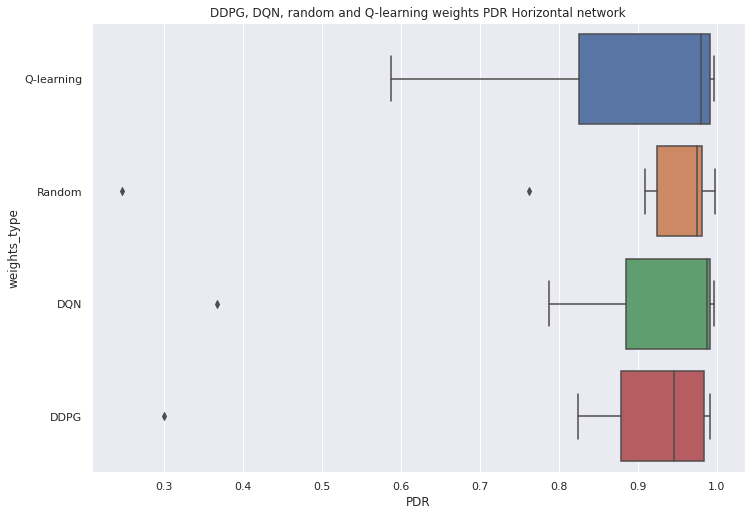

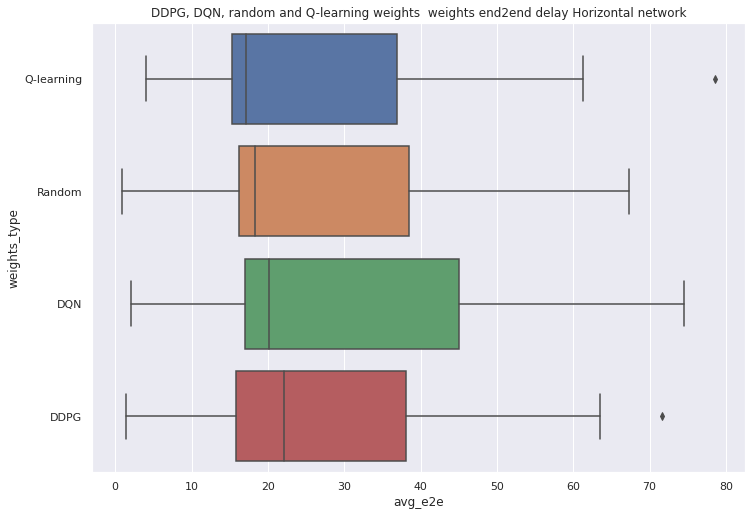

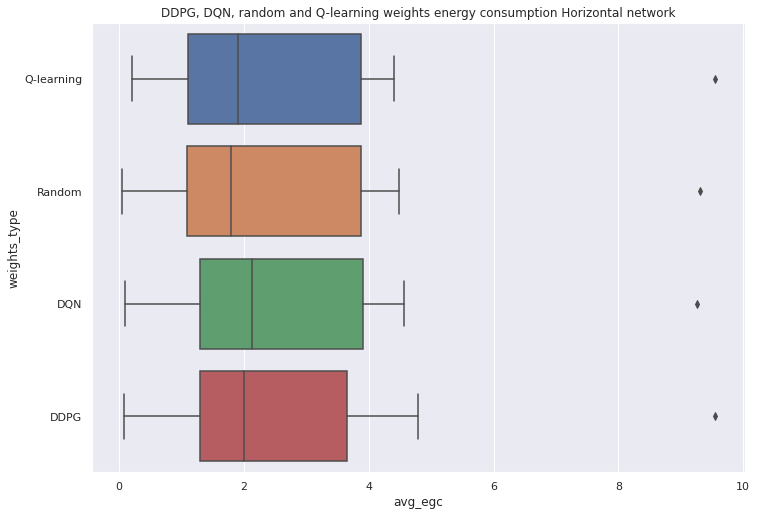

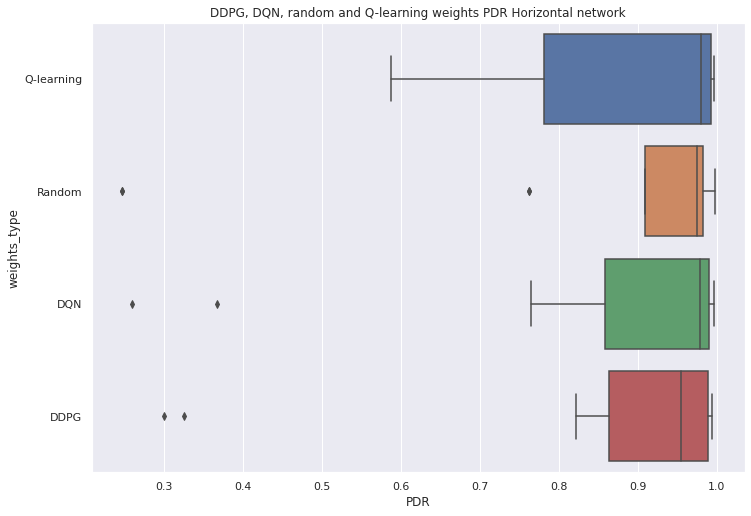

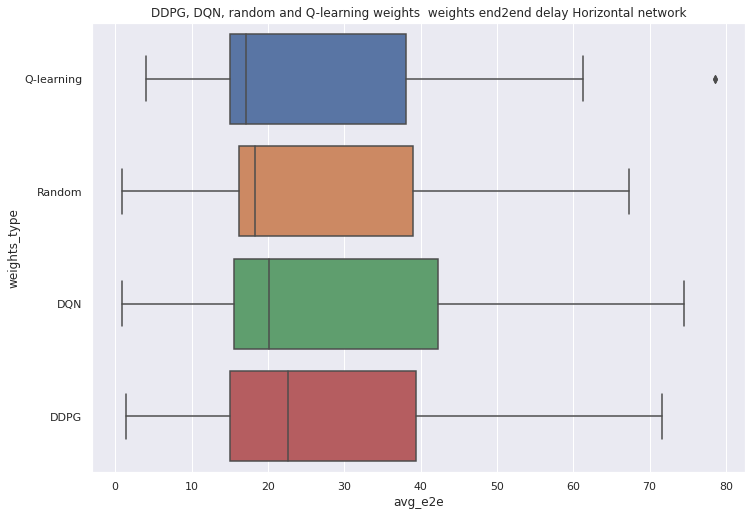

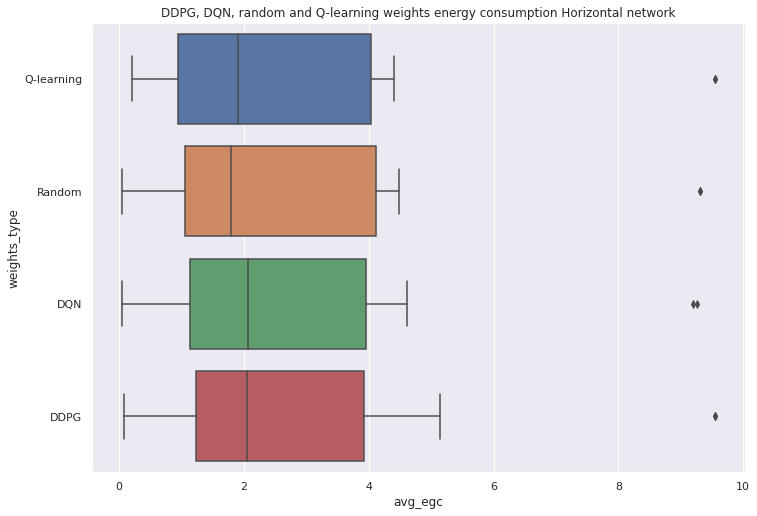

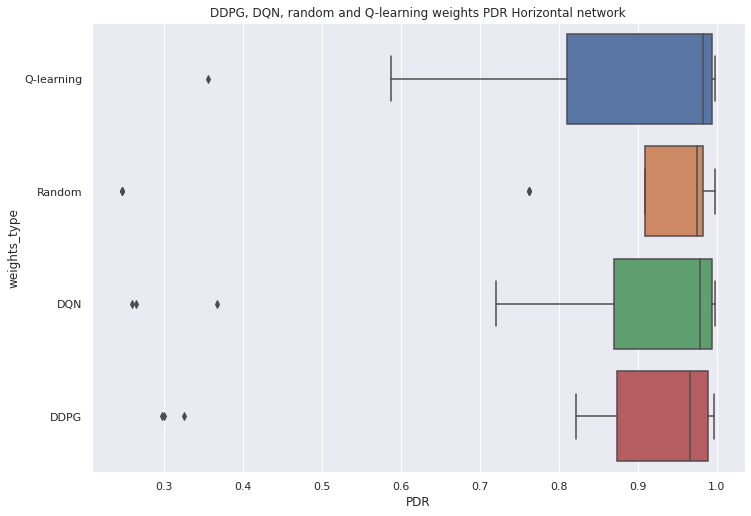

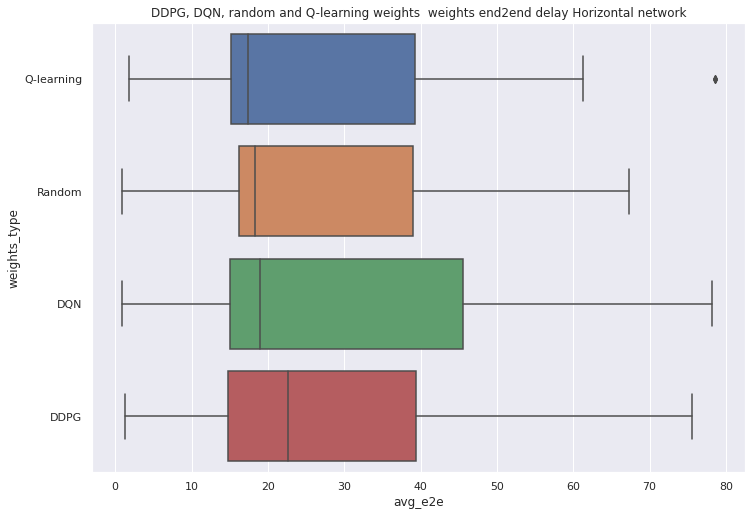

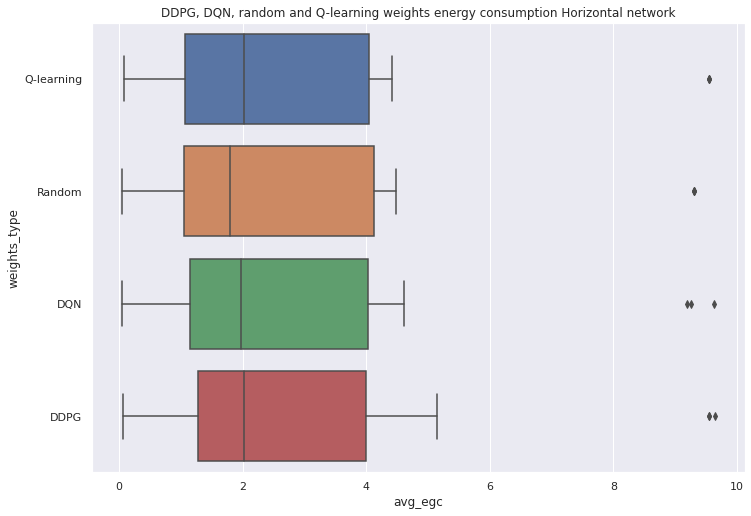

In [72]:
network_type = ['VN', 'HN']
real_networks_names = ['Vertical network', 'Horizontal network']

df= pd.DataFrame({'scenario_number':[], 'weights_type':[], 'PDR': [], 'avg_e2e':[], 'avg_egc':[] 
                     , 'RL_type':[]})
RL_types = ['RL_version I', 'RL_version II', 'RL_version III']
RL_file_num = ['1', '2', '3']
for idx, nt in enumerate(network_type): 
  if nt == 'VN':
      continue
  for i, rl in enumerate(RL_types): 
      df = get_results(df, nt, real_networks_names[idx],  RL_file_num[i] , RL_types[i])

In [73]:
df

,scenario_number,weights_type,PDR,avg_e2e,avg_egc,RL_type
0,scenario_1,Q-learning,0.995470,78.5799,9.544873,RL_version I
1,scenario_2,Q-learning,0.957900,16.9459,2.108206,RL_version I
2,scenario_3,Q-learning,0.765573,8.3339,0.849392,RL_version I
3,scenario_4,Q-learning,0.992005,34.9278,4.410853,RL_version I
4,scenario_5,Q-learning,0.996771,61.3430,4.037937,RL_version I
...,...,...,...,...,...,...
115,scenario_6,DDPG,0.974119,17.0552,1.791085,RL_version III
116,scenario_7,DDPG,0.927448,14.6093,1.422244,RL_version III
117,scenario_8,DDPG,0.827770,20.1540,1.348279,RL_version III
118,scenario_9,DDPG,0.297397,1.2727,0.055938,RL_version III


# Statistics table:

In [ ]:
df_2 = pd.DataFrame({'weights_type':[], 'RL_type':[], 'measure': [], 'mean':[], 'std':[] , 'min':[], 
                     '25%':[], '50%':[], '75%':[], 'max':[]})

measures = ['PDR', 'avg_e2e', 'avg_egc']
methods = ['DDPG', 'DQN', 'Q-learning', 'Random']
RL_types = ['rew1', 'rew2', 'rew3']
RL_types_names = ['RL_version I', 'RL_version II','RL_version III']
for rt in RL_types_names:
    for method in methods:
        for measure in measures:
            x = df[df['weights_type'] == method]
            stat = x[df['RL_type'] == rt][measure].describe()
            row = {'weights_type':method, 'RL_type':rt, 'measure':measure, 'mean':stat.iloc[1], 'std':stat.iloc[2] ,
                  'min':stat.iloc[3],'25%':stat.iloc[4], '50%':stat.iloc[5], '75%':stat.iloc[6],
                  'max':stat.iloc[7]}
            df_2 = df_2.append(row, ignore_index=True)


In [ ]:
df_2

In [68]:
df_2.to_excel('statistics.xlsx', index=False)

# Rl mesures:


In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

def read(nt_type, method, rew_type):
  with open('results_' + method + '_' + nt_type + '_rl_measures_' + rew_type +'.pkl', 'rb') as file:
      rl_measure = pickle.load(file)
  return rl_measure

In [ ]:
network_type = ['VN', 'HN']
#methods = ['DQN', 'DDPG', 'Q-learning']
methods = ['DDPG']
rew_types = ['rew2', 'rew1', 'rew3']
real_networks_names = ['Vertical network', 'Horizontal network']
df = pd.DataFrame({'method':[], 'reward':[], 'role_change':[], 'energy_change':[], 'reward_type':[]})

for idx, nt in enumerate(network_type): 
  if nt == 'VN':
      continue
  for rw in rew_types:
    for method in methods:
      dict_ = read(nt, method, rw)
      keys_list = list(dict_.keys())
      for i in range(len(dict_[keys_list[0]])):
          row = {'method':method, 'reward':dict_[keys_list[0]][i], 'role_change':dict_[keys_list[1]][i],
                'energy_change':dict_[keys_list[2]][i], 'reward_type':rw}
          df = df.append(row, ignore_index=True)
      real_network_name = real_networks_names[idx]
        
      fig , ax = plt.subplots()
      fig.set_size_inches(16, 10)
      plt.title(method + ' reward convergance, type' + rw)
      plt.plot(dict_['reward'][::10], linewidth=3)
      plt.savefig('reward_convergance' + '_' + method + '_' + nt + '.png')
      
      fig , ax = plt.subplots()
      fig.set_size_inches(16, 10)
      plt.title(method + ' rl measures')
      plt.plot(dict_['reward'][::10], linewidth=3, label='reward')
      plt.plot(dict_['role_change'][::10], linewidth=3, label='role_change')
      plt.plot(dict_['energy_change'][::10], linewidth=3, label = 'energy_change')
      plt.legend()
      plt.savefig('rl_measures_time_series_' + '_' + method + '_' + nt + '.png')
      plt.savefig('rl_measures_time_series_' + '_' + method + '_' + nt + '.svg')
      
  

In [ ]:
df

,method,reward,role_change,energy_change,reward_type
0,DDPG,0.617813,10.745098,1.218696,rew2
1,DDPG,0.854569,2.725490,0.350804,rew2
2,DDPG,0.844785,1.686275,0.364164,rew2
3,DDPG,0.884559,1.705882,0.537915,rew2
4,DDPG,0.865620,2.333333,0.374040,rew2
...,...,...,...,...,...
2989,DDPG,0.814997,2.784314,0.538742,rew3
2990,DDPG,0.873102,2.470588,0.320219,rew3
2991,DDPG,0.876842,2.352941,0.510175,rew3
2992,DDPG,0.857311,1.254902,0.514607,rew3


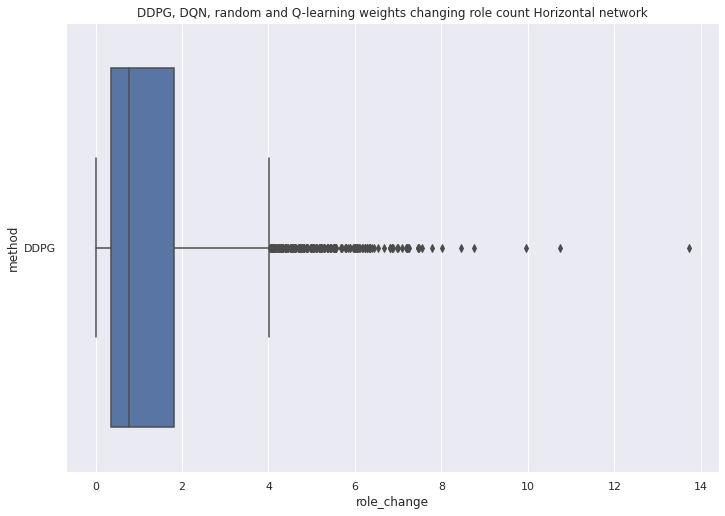

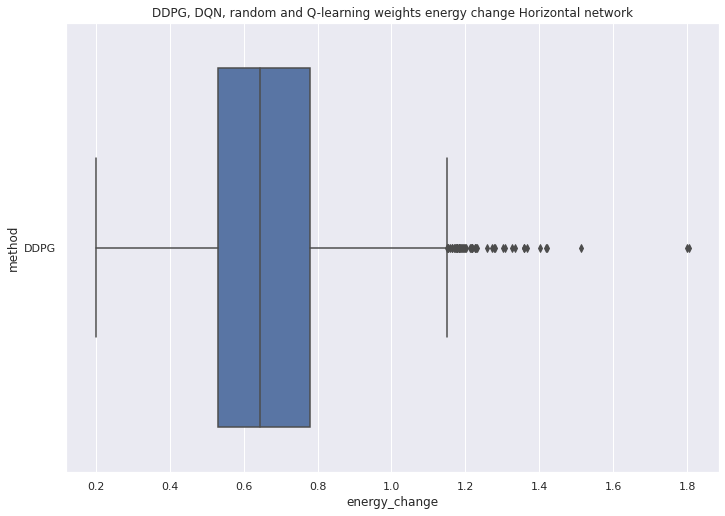

In [ ]:
plot_boxPlot('DDPG, DQN, random and Q-learning weights changing role count ' + real_network_name, df, "role_change", "method", nt ,'role_change_boxPlot')
plot_boxPlot('DDPG, DQN, random and Q-learning weights energy change ' + real_network_name, df, "energy_change", "method", nt, 'energy_change_boxPlot')


# Rewards compersion

In [8]:
def read_with_rewards(method, nt):
    with open('results_' + method + '_' + nt + '_rew1.pkl', 'rb') as file:
            results_1 = pickle.load(file)
    with open('results_' + method + '_' + nt + '_rew2.pkl', 'rb') as file:
            results_2 = pickle.load(file)
    with open('results_' + method + '_' + nt + '_rew3.pkl', 'rb') as file:
            results_3 = pickle.load(file)
    return results_1, results_2, results_3

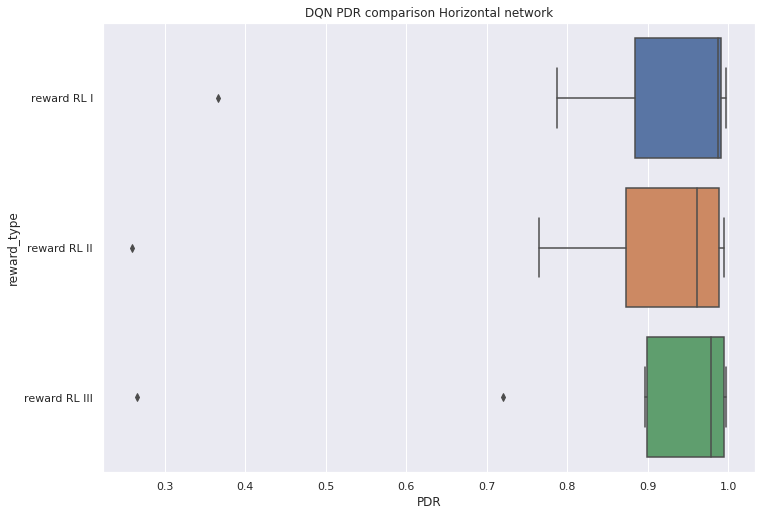

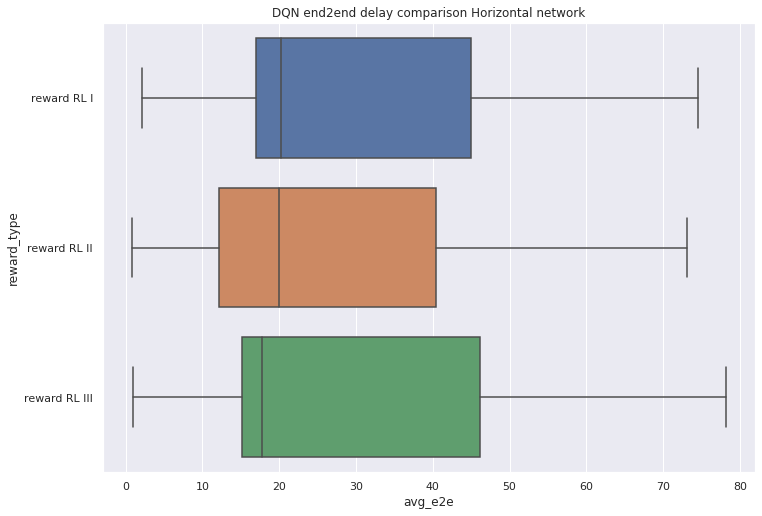

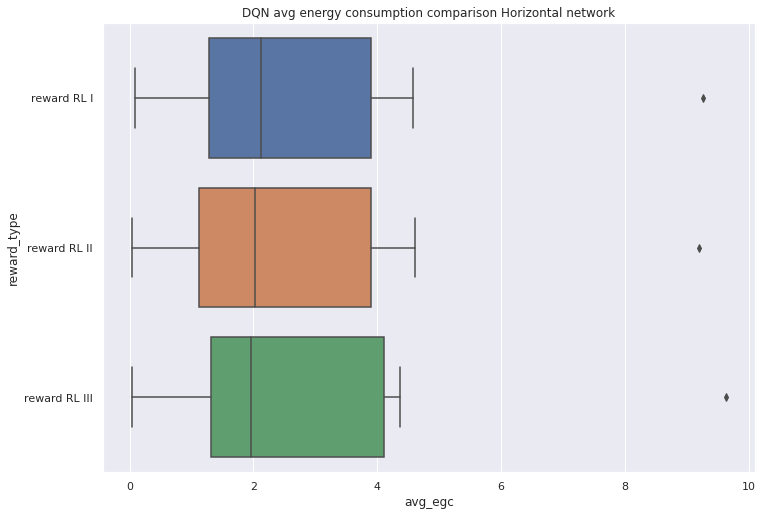

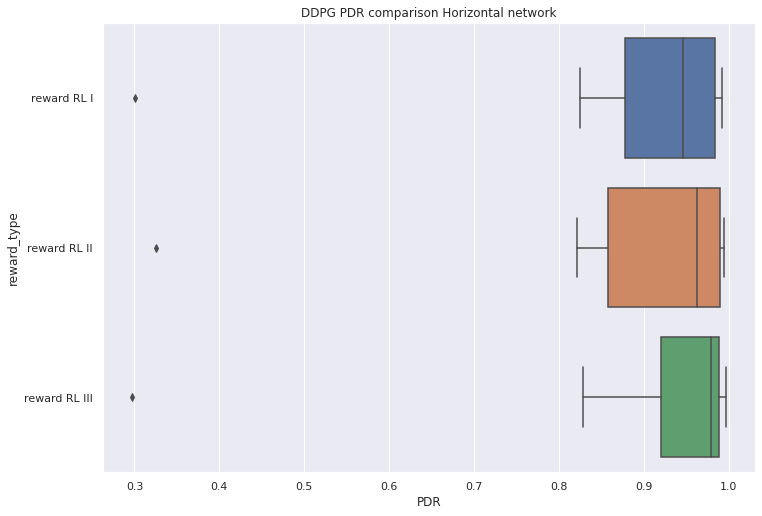

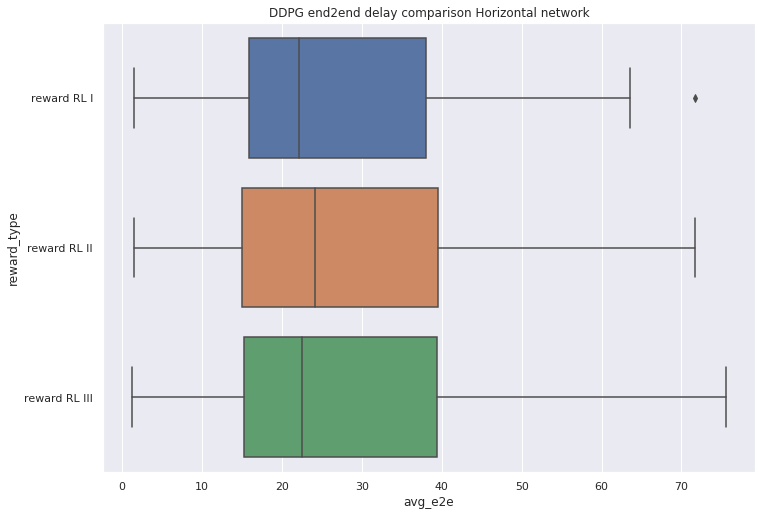

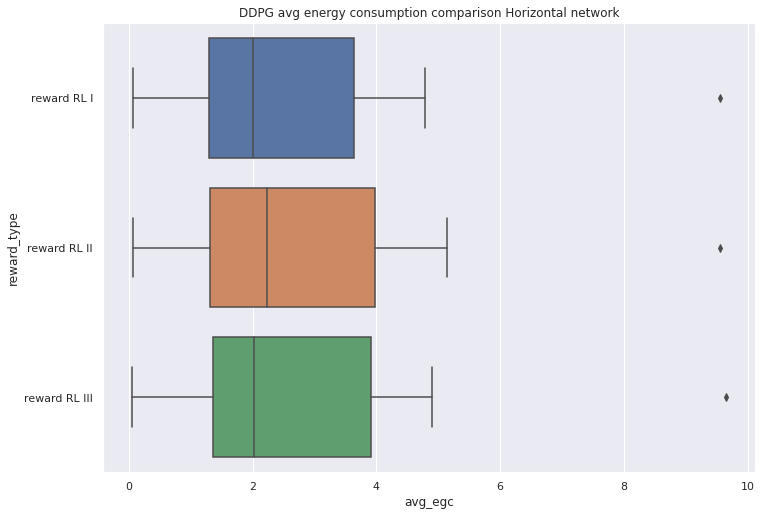

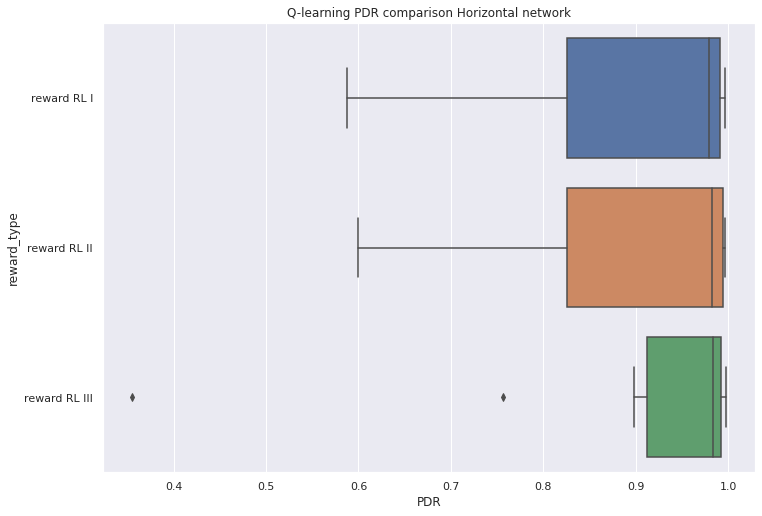

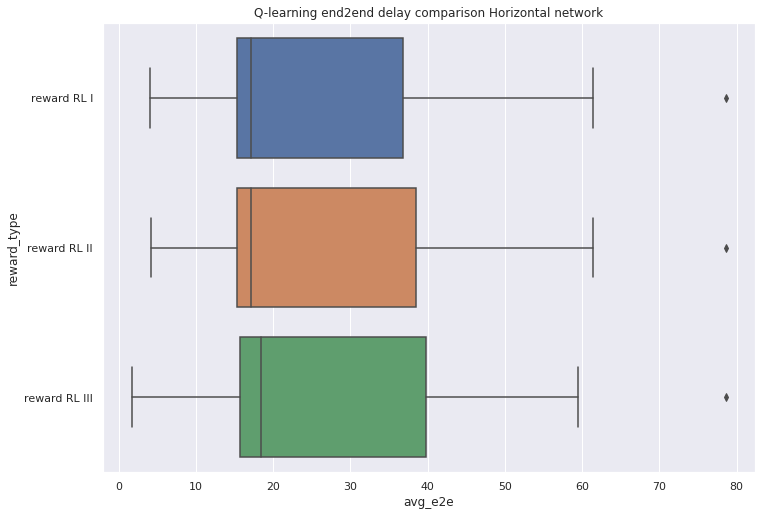

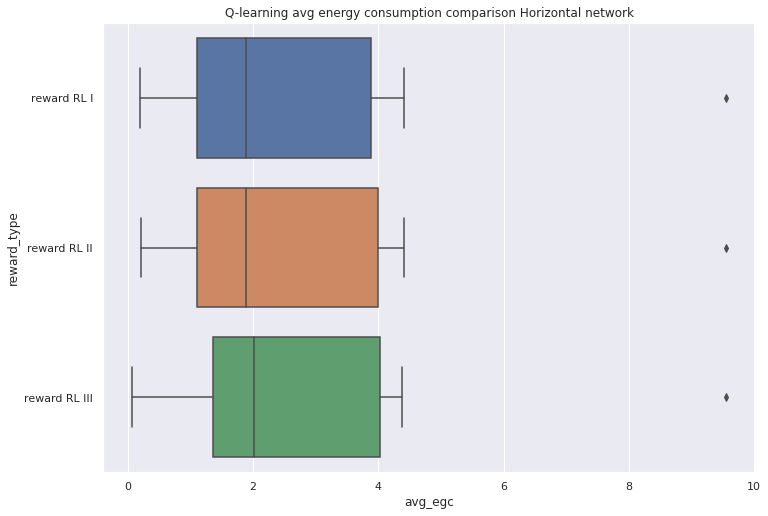

In [10]:
def insert_to_df_with_reward(df, results, type_cluster, rew):
    for key in results:
        PDR, avg_e2e, avg_egc = results[key][-1]
        row = {'scenario_number':key, 'weights_type':type_cluster, 'PDR':PDR, 'avg_e2e':avg_e2e, 'avg_egc':avg_egc, 'reward_type':rew}
        df = df.append(row, ignore_index=True)
    return df

network_type = ['VN', 'HN']
methods = ['DQN', 'DDPG', 'Q-learning']
rew_types = ['rew2', 'rew1', 'rew3']
real_networks_names = ['Vertical network', 'Horizontal network']

for idx, nt in enumerate(network_type):
  real_network_name = real_networks_names[idx]
  if nt == 'VN':
    continue
  for method in methods:
    
    results_rew1, results_rew2, results_rew3  = read_with_rewards(method, nt)
    df= pd.DataFrame({'scenario_number':[], 'weights_type':[], 'PDR': [], 'avg_e2e':[], 'avg_egc':[], 'reward_type':[] })
    df = insert_to_df_with_reward(df, results_rew1, method, 'reward RL I')
    df = insert_to_df_with_reward(df, results_rew2, method, 'reward RL II')
    df = insert_to_df_with_reward(df, results_rew3, method, 'reward RL III')

    plot_boxPlot(method + ' PDR comparison ' + real_network_name, df, "PDR", "reward_type", nt ,method + '_PDR_with_rewards_boxPlot')
    plot_boxPlot(method + ' end2end delay comparison ' + real_network_name, df, "avg_e2e", "reward_type", nt , method + '_avg_e2e_with_rewards_boxPlot')
    plot_boxPlot(method + ' avg energy consumption comparison ' + real_network_name, df, "avg_egc", "reward_type", nt , method + '_avg_egc_with_rewards_boxPlot')



# BarPlot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barPlot(title, x, y, nt,  save_path=None):
    plt.figure()
    sns.set(rc={'figure.figsize':(11.7,8.27)}) 
    plt.title(title)

    sns.barplot(data=df, x=x, y=y)
    if save_path is not None:
        plt.savefig(save_path + '_' + nt + '.png')


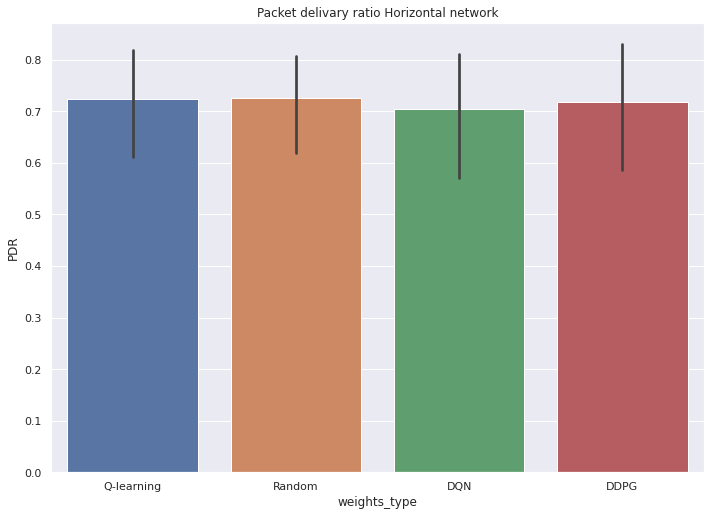

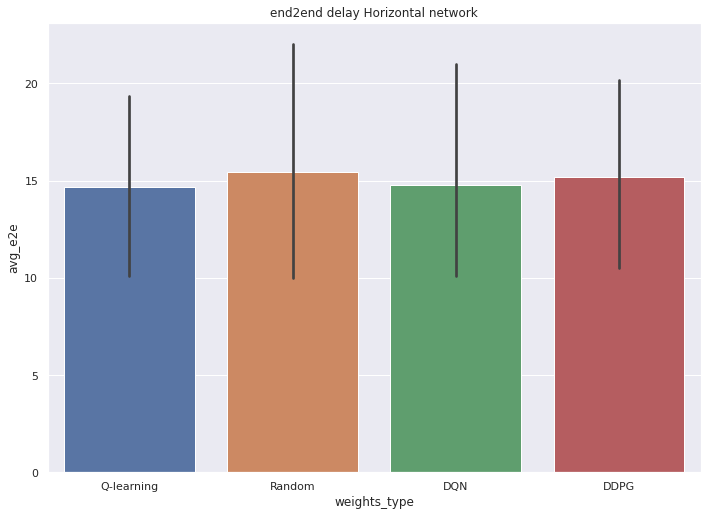

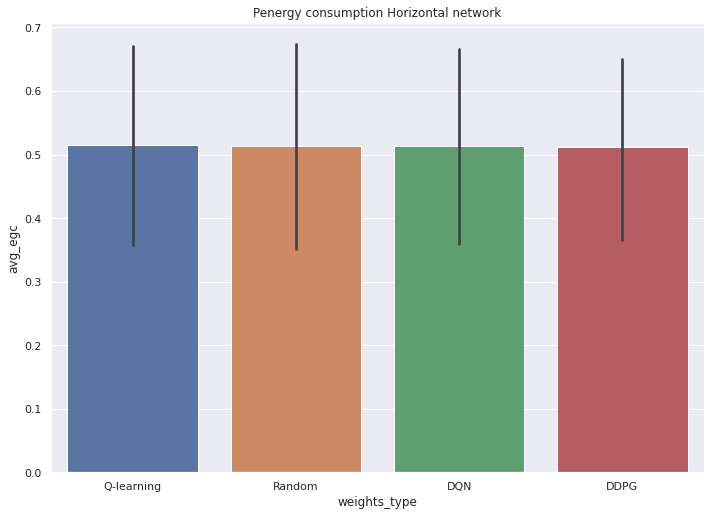

In [ ]:
for idx, nt in enumerate(network_type):
    if nt == 'VN':
      continue
    df = get_df(nt)
    plot_barPlot('Packet delivary ratio ' + real_networks_names[idx], 'weights_type', 'PDR', nt, 'pdr')
    plot_barPlot('end2end delay ' + real_networks_names[idx], 'weights_type', 'avg_e2e', nt,  'etoe')
    plot_barPlot('Penergy consumption ' + real_networks_names[idx], 'weights_type', 'avg_egc',  nt, 'ec')


In [ ]:
df[df['weights_type'] == 'DQN']['PDR'].median()

0.7804574412019812

In [ ]:
df

,scenario_number,weights_type,PDR,avg_e2e,avg_egc
0,scenario_1,Q-learning,0.517683,14.2349,0.909825
1,scenario_2,Q-learning,0.816685,12.3864,0.501911
2,scenario_3,Q-learning,0.831457,9.9099,0.293751
3,scenario_4,Q-learning,0.608375,10.1207,0.640162
4,scenario_5,Q-learning,0.766469,30.8959,0.843104
5,scenario_6,Q-learning,0.827953,10.2485,0.434095
6,scenario_7,Q-learning,0.902253,12.3196,0.439099
7,scenario_8,Q-learning,0.856943,23.1048,0.370180
8,scenario_9,Q-learning,0.321508,1.3836,0.034770
9,scenario_10,Q-learning,0.795998,21.9401,0.683790


# Time series

In [ ]:
import numpy as np

legend_properties = { 'size': 14}

for measure,value in methods.items():
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.grid(True)
    for method, val in value.items():
        
        
        x = val
        ax.scatter(x=np.arange(0, len(x), 100), y=x[::100])
        ax.plot(np.arange(0, len(x), 100), x[::100], label=method)
       
        ax.set_title(measure, fontsize=14, fontweight='bold')

        ax.set_xlabel('Time')
        ax.set_ylabel('{}'.format(measure))
        plt.legend(loc='lower right' , prop = legend_properties)

        plt.savefig('TS_' +measure)
        # plt.show()
        # idx += 1